## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import requests,nltk
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
url='https://www.gutenberg.org/files/16/16-h/16-h.htm'

In [4]:
r=requests.get(url)

In [5]:
r.status_code

200

In [6]:
soup = BeautifulSoup(r.content, "html.parser")

In [8]:
chp_text = soup.text

In [9]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(chp_text)
print(tokens[:30])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', 'by', 'James', 'M', 'Barrie', 'The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', 'by', 'James', 'M', 'Barrie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


In [48]:
# nltk.download('punkt')  # Download required resources (only once)

In [49]:
###
# nltk.download('stopwords') for one time use to download data from nltk


In [14]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [15]:
tokens=[word.lower() for word in tokens]
tokens[:30]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'peter',
 'pan',
 'by',
 'james',
 'm',
 'barrie',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'peter',
 'pan',
 'by',
 'james',
 'm',
 'barrie',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone']

In [16]:
meaningful_words=[i for i in tokens if i not in stop_words]
meaningful_words[:30]

['project',
 'gutenberg',
 'ebook',
 'peter',
 'pan',
 'james',
 'barrie',
 'project',
 'gutenberg',
 'ebook',
 'peter',
 'pan',
 'james',
 'barrie',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away']

In [55]:
#there are two ways of getting sorted list
#top_10_words=sorted(word_count.items(), key=lambda pair: pair[1], reverse=True)[:10]
word_count=Counter(meaningful_words)
top_10_words=word_count.most_common(10)
top_10_words

[('peter', 409),
 ('wendy', 362),
 ('said', 358),
 ('would', 217),
 ('one', 212),
 ('hook', 174),
 ('could', 142),
 ('cried', 136),
 ('john', 133),
 ('time', 126)]

In [19]:
protagonists=['peter','wendy','hook','john']

In [41]:
[i[0] for i in top_10_words]

['peter',
 'wendy',
 'said',
 'would',
 'one',
 'hook',
 'could',
 'cried',
 'john',
 'time']

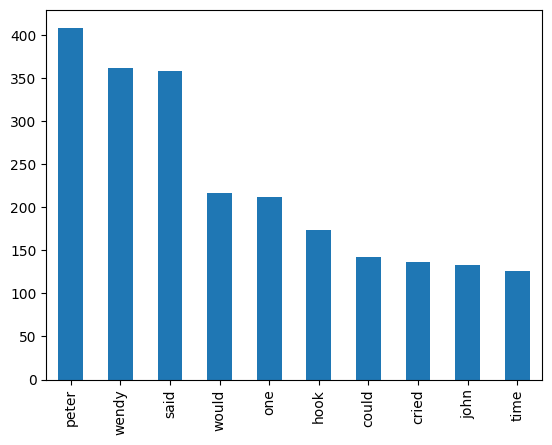

In [46]:
pd.DataFrame(top_10_words,index=[i[0] for i in top_10_words]).plot(kind='bar')
# pd.DataFrame(top_10_words)
plt.legend().remove()
plt.show()